In [74]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

make_blobs создает изотропные гауссовские "блоб" (облака точек), которые удобно использовать для тестирования алгоритмов кластеризации, таких как K-средние.

In [75]:
features, labels = make_blobs(n_samples=200, centers=5, n_features=2, random_state=None)

return
Xndarray of shape (n_samples, n_features)
The generated samples.

yndarray of shape (n_samples,)
The integer labels for cluster membership of each sample.

Далее мы обучим модель с помощью 5 кластеров и ограничим ее 10 итерациями с разными центроидными значениями.


In [76]:
model = KMeans(
    n_clusters=5,
    n_init=10,
    random_state=42
    )
 
# train the model
model.fit(features)
 
# make a prediction on the data
p_labels = model.predict(features)


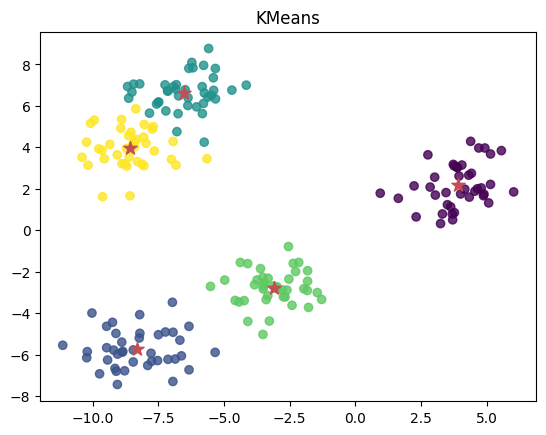

In [77]:
plt.style.use('default')
 
X = features[:,0]
y = features[:,1]
 
plt.scatter(X, y, c=p_labels, alpha=0.8)
 
cluster_centers = model.cluster_centers_
cs_x = cluster_centers[:,0]
cs_y = cluster_centers[:,1]
 
plt.scatter(cs_x, cs_y, marker='*', s=100, c='r')
plt.title('KMeans')
plt.show()

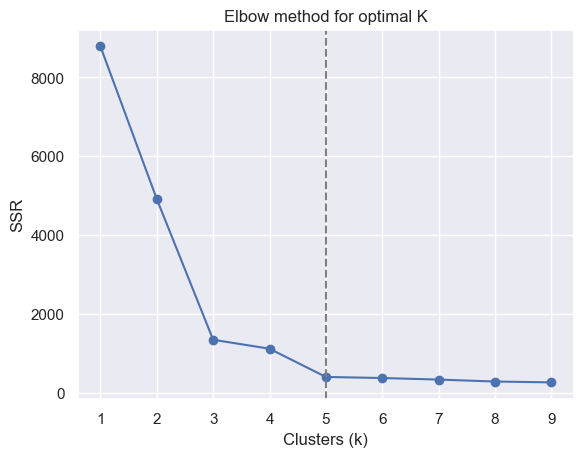

In [78]:
import matplotlib.pyplot as plt
sns.set()
 
ks = range(1, 10)
ssr = []

# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k)
 
    # fit the model
    model.fit(features)
 
    # append the inertial to a list
    ssr.append(model.inertia_)
     
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()


inertia_ — это атрибут модели KMeans в библиотеке scikit-learn, который измеряет качество кластеризации. Он представляет собой сумму квадратов расстояний между каждой точкой данных и центроидом (средним значением) соответствующего кластера.
Как это работает?
Расчет: Для каждого кластера вычисляется расстояние от каждой точки до его центроида, это расстояние затем возводится в квадрат. Все эти значения суммируются для всех кластеров, что и дает значение inertia_.
Интерпретация: Низкое значение inertia_ указывает на то, что точки данных близки к своим центроидам, что свидетельствует о хорошей кластеризации. Напротив, высокое значение может указывать на то, что кластеры плохо разделены.

Создать программу кластеризации данных методом k-means (на 5 кластеров, выбрав самостоятельно количество итераций). Данные предварительно необходимо нормализовать, приведя среднее значение по каждому признаку к значению «0» и среднеквадратичное отклонение по каждому признаку к «1». 
Данные находятся в файле «delaney-processed.csv» для кластеризации используйте поля: 
'Polar Surface Area', 
'Molecular Weight', 
'measured log solubility in mols per litre',
 применив вывод 3D графика.
Для вывода 3D графика можно воспользоваться библиотекой Matplotlib раздел “3D scatterplot”.
https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
Используя, например, метод axes
 plt.axes(projection="3d")

Нормализуем данные:

In [79]:
df = pd.read_csv('/Users/tatianasalamatova/chemoinformatics/02/delaney-processed.csv')
new_data = df[['Polar Surface Area', 'Molecular Weight', 'measured log solubility in mols per litre']]

In [80]:
new_data

,Polar Surface Area,Molecular Weight,measured log solubility in mols per litre
0,202.32,457.432,-0.770
1,42.24,201.225,-3.300
2,17.07,152.237,-2.060
3,0.00,278.354,-7.870
4,0.00,84.143,-1.330
...,...,...,...
1123,0.00,197.381,-1.710
1124,71.00,219.266,0.106
1125,18.46,246.359,-3.091
1126,0.00,72.151,-3.180


Standardize features by removing the mean and scaling to unit variance.

In [81]:
scaler = StandardScaler()
normalized_new_data = scaler.fit_transform(new_data)

#Он генерит число массивов = числу строк в исходном датасете и в каждом массиве будет n 
#(в нашем случае 3) значений = числу признаков

n_init:
Этот параметр определяет, сколько раз алгоритм K-means будет запущен с разными начальными центроидами. Каждый запуск будет использовать случайные начальные значения для центров кластеров.
После выполнения всех запусков, K-means выбирает лучшее решение на основе минимального значения инерции (суммы квадратов расстояний от точек до их центроидов). Это помогает избежать локальных минимумов и улучшает качество кластеризации.
Например, если n_init=10, алгоритм будет запущен 10 раз, и результат с наименьшей инерцией будет выбран в качестве окончательного.


max_iter:
Этот параметр задает максимальное количество итераций, которые алгоритм будет выполнять для одной инициализации центроидов. Если алгоритм не сойдется (то есть не достигнет стабильного состояния, когда центры кластеров перестают изменяться) до достижения этого числа итераций, он завершит выполнение.
Значение по умолчанию для max_iter обычно равно 300, но его можно изменить в зависимости от требований к точности и времени выполнения.

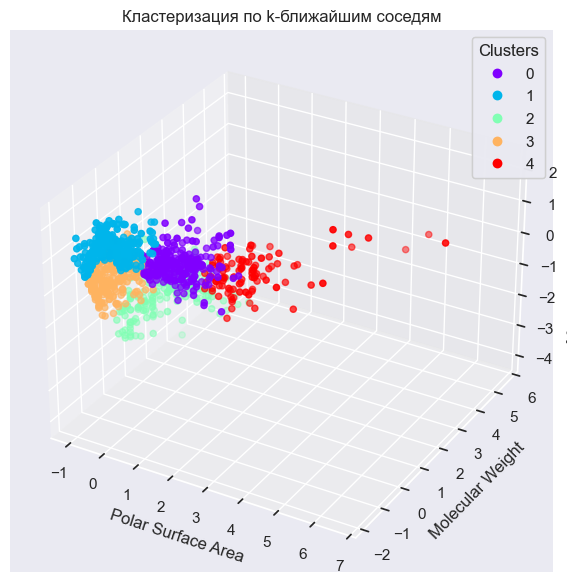

In [82]:
# Кластеризация методом K-means
k = 5  # количество кластеров
iterations_start = 15
model = KMeans(n_clusters=k, n_init=iterations_start, max_iter=300, random_state=42)
model.fit(normalized_new_data)

# Получение меток кластеров
labels = model.labels_

# Визуализация результатов в 3D
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111, projection='3d')

# Отображение точек с цветами в зависимости от кластера
scatter = ax.scatter(normalized_new_data[:, 0], normalized_new_data[:, 1], normalized_new_data[:, 2], c=labels, cmap='rainbow')

# Настройка графика
ax.set_title('Кластеризация по k-ближайшим соседям')
ax.set_xlabel('Polar Surface Area')
ax.set_ylabel('Molecular Weight')
ax.set_zlabel('Measured Log Solubility')

# Добавление легенды
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()